In [1]:
# import libraries
from liqupy.boreholes import Borehole # import the analyses at boreholes from LiquPy library

from liqupy.default_datasets import load_spt_idriss_boulanger # default default spt dataset of LiquPy

In [2]:
# load dataset from LiquPy's default datasets
# NOTE: you may load your own subsurface data as a Pandas DataFrame and use it as the input;
#       in this case you must make sure your input data has the same format as the table below
borehole_data = load_spt_idriss_boulanger()

# have a peek at dataset
borehole_data.head()

,SPT sample number,Depth (m),Measured N,Soil type (USCS),EXCLUDE,Fines content (%),unit weight (kN/m3)
0,1,1.1,4,SP,NaN,0.0,19
1,2,1.8,5,SP,NaN,2.0,19
2,3,2.6,4,SP,NaN,2.0,20
3,4,3.4,6,SP,NaN,1.0,20
4,5,4.1,8,SP,NaN,1.0,20


In [3]:
# create a borehole object given the bore log data 
log1 = Borehole(borehole_data, name="LiquPy's default borehole")

In [4]:
# run simplified liquefaction triggering method on log1 to calculate factors of safety
log1.simplified_liquefaction_triggering_fos(Pa=0.280, M=6.9, Zw=1.8, sampler_correction_factor=1,
                                            liner_correction_factor=1, hammer_energy=75, rod_extension=1.5)

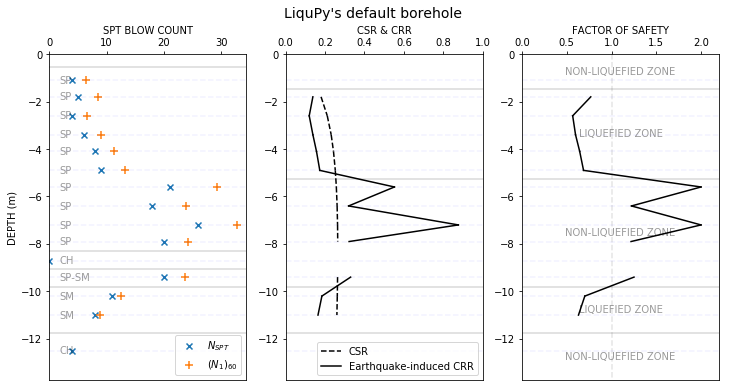

In [5]:
#visualize the output
log1.visualize()

e:\google drive\phd dissertation\liqupy\liqupy\liqupy\boreholes.py:106: UserWarning: Cetin et al 2004 method of adjustments for fines content is only applicable to fines content in the range of 5% to 35%
  warnings.warn('Cetin et al 2004 method of adjustments for fines content is only applicable to fines content in the range of 5% to 35%')


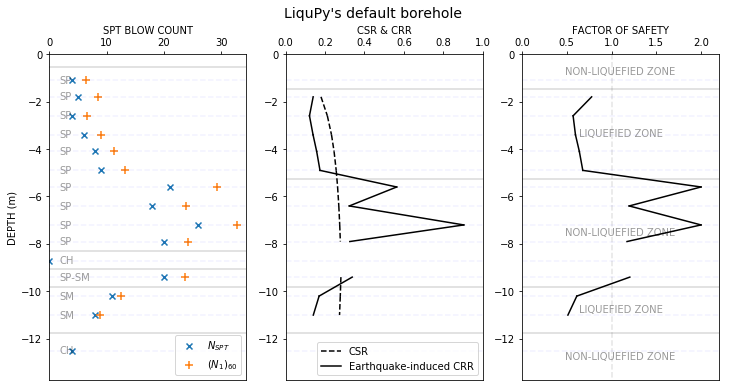

In [6]:
# run simplified liquefaction triggering method on log1 to calculate factors of safety, 
# using Shear stress reduction factor from LiaoWhitman1986 and Adjustments for fines content from Cetin et al. (2004)
# Note how the library warned about the limitation stated by Cetin et 
log1.simplified_liquefaction_triggering_fos(Pa=0.280, M=6.9, Zw=1.8, sampler_correction_factor=1,
                                            liner_correction_factor=1, hammer_energy=75, rod_extension=1.5, 
                                            rd_method='LiaoWhitman1986', fc_method='cetin2004')
log1.visualize()

In [6]:
#save the output to an EXCEL file
log1.save_to_file('triggering_analysis_on_log_from_Idriss_and_Boulanger')

triggering_analysis_on_log_from_Idriss_and_Boulanger.xls has been saved.


In [7]:
# run lateral spread and settlement analysis based on Zhang & Robinson's model
# NOTE: you need to run simplified_liquefaction_triggering_fos() Method on the log before running this Method
log1.calc_ls_zhang2004(save_to_file=True, file_name='zhang2004_lateral_spread_analysis')

LDI = 2.3026935216812205, settlement = 0.21689127412305004
zhang2004_lateral_spread_analysis.xls has been saved.


In [8]:
# run simplified liquefaction triggering method on log1 to calculate probability of liquefaction
log1.simplified_liquefaction_triggering_fos(Pa=0.280, M=6.9, Zw=1.8, sampler_correction_factor=1,
                                            liner_correction_factor=1, hammer_energy=75, rod_extension=1.5, output='probability')

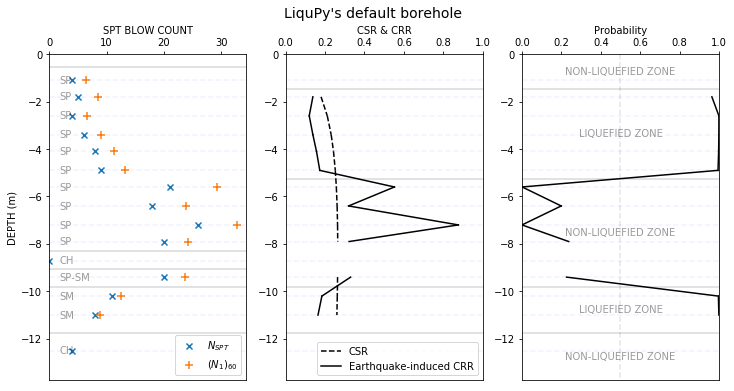

In [9]:
#visualize the output
log1.visualize()